In [97]:
from wordcloud import WordCloud, STOPWORDS
import os

import pandas as pd
import numpy as np
import re

#ensure all Plotly plots render while offline
import matplotlib.pyplot as plt
import seaborn as sb

from plotly.offline import iplot, init_notebook_mode
import plotly.graph_objects as go
import plotly.express as px

init_notebook_mode(connected=True)

%matplotlib inline

In [98]:
#custom function to read data into Pandas DataFrame
def open_set(csv, sep=',', encoding='utf-8', usecols=None):
    df = pd.read_csv('data/'+csv, low_memory=False, encoding=encoding)
    
    return df

In [99]:
df_animes = open_set('animes_cleaned.csv')
df_reviews = open_set('reviews_cleaned.csv', encoding='latin', usecols=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
df_users = open_set('users_cleaned.csv')


In [100]:
def describe_pretty(x):
    if type(x) == float:
        x = f'{x:.1f}'
    elif type(x) == str:
        x = x
    
    return x

In [101]:
for frame in [df_animes, df_users, df_reviews.iloc[:,0:11]]:
    display(frame.head(), frame.info(), frame.describe().applymap(lambda x: describe_pretty(x)))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7158 entries, 0 to 7157
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   anime_id         7158 non-null   int64  
 1   title            7158 non-null   object 
 2   genre            7158 non-null   object 
 3   studio           7158 non-null   object 
 4   season_released  7158 non-null   object 
 5   year_released    7158 non-null   int64  
 6   type             7158 non-null   object 
 7   source           7158 non-null   object 
 8   episodes         7158 non-null   int64  
 9   status           7158 non-null   object 
 10  rank             7158 non-null   int64  
 11  image_url        7157 non-null   object 
 12  rating           7158 non-null   object 
 13  score            7158 non-null   float64
 14  scored_by        7158 non-null   int64  
 15  score_rank       7158 non-null   float64
 16  popularity       7158 non-null   int64  
 17  popularity_ran

,anime_id,title,genre,studio,season_released,year_released,type,source,episodes,status,...,image_url,rating,score,scored_by,score_rank,popularity,popularity_rank,members,favorites,avg_rank_score
0,5114,Fullmetal Alchemist: Brotherhood,Action,Bones,Spring,2009,TV,Manga,64,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,R - 17+ (violence & profanity),9.25,733592,2.0,4,4.0,1199091,106895,3.0
1,9253,Steins;Gate,Thriller,White Fox,Spring,2011,TV,Visual novel,24,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,PG-13 - Teens 13 or older,9.14,563857,5.0,8,8.0,1010330,92423,6.5
2,1575,Code Geass: Hangyaku no Lelouch,Action,Sunrise,Fall,2006,TV,Original,25,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,R - 17+ (violence & profanity),8.79,627740,22.0,9,9.0,986897,63614,15.5
3,30276,One Punch Man,Action,Madhouse,Fall,2015,TV,Web manga,12,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,R - 17+ (violence & profanity),8.73,691845,27.0,5,5.0,1020754,30747,16.0
4,1535,Death Note,Mystery,Madhouse,Fall,2006,TV,Manga,37,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,R - 17+ (violence & profanity),8.67,1009477,31.0,1,1.0,1456378,88696,16.0


None

,anime_id,year_released,episodes,rank,score,scored_by,score_rank,popularity,popularity_rank,members,favorites,avg_rank_score
count,7158.0,7158.0,7158.0,7158.0,7158.0,7158.0,7158.0,7158.0,7158.0,7158.0,7158.0,7158.0
mean,15655.7,2009.1,12.2,3579.0,6.7,22267.6,218.3,4649.9,3057.5,44227.3,613.5,1637.9
std,12982.9,6.8,31.0,2066.5,1.2,58877.2,94.2,3487.5,1765.0,101546.2,3682.4,914.3
min,1.0,1992.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,16.0,0.0,3.0
25%,3078.5,2005.0,1.0,1790.0,6.3,555.0,154.0,1830.2,1550.2,1998.0,2.0,863.5
50%,11506.0,2011.0,4.0,3579.5,6.9,3328.0,210.0,3845.5,3031.5,9020.5,16.0,1621.8
75%,30190.0,2015.0,13.0,5368.0,7.4,17143.5,268.0,6858.8,4553.8,38315.0,115.0,2409.0
max,37916.0,2018.0,1818.0,7158.0,9.5,1009477.0,510.0,14456.0,6231.0,1456378.0,106895.0,3370.5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137902 entries, 0 to 137901
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   gender                  137902 non-null  object 
 1   age                     137902 non-null  int64  
 2   age_group               137902 non-null  object 
 3   stats_mean_score        137902 non-null  float64
 4   episodes_watched        137902 non-null  float64
 5   days_spent_watching     137902 non-null  float64
 6   watching                137902 non-null  int64  
 7   completed               137902 non-null  int64  
 8   dropped                 137902 non-null  int64  
 9   on_hold                 137902 non-null  int64  
 10  plan_to_watch           137902 non-null  int64  
 11  rewatched               137902 non-null  float64
 12  total_anime_engagement  137902 non-null  int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 13.7+ MB


,gender,age,age_group,stats_mean_score,episodes_watched,days_spent_watching,watching,completed,dropped,on_hold,plan_to_watch,rewatched,total_anime_engagement
0,Female,32,Seniors,7.43,3391.0,55.31,3,49,0,1,0,0.0,53
1,Female,23,Youth,9.13,2978.0,49.44,13,21,0,7,12,15.0,53
2,Male,28,Young Adults,8.49,2774.0,47.61,0,43,1,1,8,33.0,53
3,Male,30,Young Adults,7.10,1554.0,25.58,5,21,7,1,19,4.0,53
4,Male,27,Young Adults,7.59,923.0,15.36,0,25,0,5,23,0.0,53


None

,age,stats_mean_score,episodes_watched,days_spent_watching,watching,completed,dropped,on_hold,plan_to_watch,rewatched,total_anime_engagement
count,137902.0,137902.0,137902.0,137902.0,137902.0,137902.0,137902.0,137902.0,137902.0,137902.0,137902.0
mean,28.6,7.9,4414.5,68.0,14.1,177.0,11.0,10.4,63.5,12.5,275.9
std,4.9,0.9,46922.2,185.7,23.4,168.2,22.2,19.7,94.7,38.9,234.8
min,6.0,1.1,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
25%,25.0,7.4,1540.0,25.7,3.0,56.0,0.0,1.0,7.0,0.0,97.0
50%,28.0,7.9,3082.0,51.1,8.0,124.0,4.0,4.0,29.0,0.0,208.0
75%,31.0,8.4,5458.8,90.0,16.0,243.0,12.0,12.0,78.0,9.0,389.0
max,75.0,10.0,16791524.0,41753.9,1038.0,1250.0,793.0,678.0,1090.0,2076.0,1305.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125865 entries, 0 to 125864
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   title                  125865 non-null  object 
 1   text                   125865 non-null  object 
 2   Overall                125865 non-null  float64
 3   Story                  125865 non-null  int64  
 4   Animation              125865 non-null  int64  
 5   Music                  125865 non-null  int64  
 6   Character Development  125865 non-null  int64  
 7   Enjoyment              125865 non-null  int64  
 8   polarity               125865 non-null  float64
 9   subjectivity           125865 non-null  float64
 10  attitude               125865 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 10.6+ MB


,title,text,Overall,Story,Animation,Music,Character Development,Enjoyment,polarity,subjectivity,attitude
0,Made in Abyss,...,10.00,10,10,10,10,10,0.157887,0.571909,Positive
1,Made in Abyss,...,0.00,0,0,0,0,0,0.148182,0.615993,Positive
2,Made in Abyss,...,9.51,9,10,9,9,10,0.204097,0.521248,Positive
3,Made in Abyss,...,10.00,10,10,10,8,9,0.184405,0.610298,Positive
4,Made in Abyss,...,8.52,7,10,10,5,6,0.152582,0.520738,Positive


None

,Overall,Story,Animation,Music,Character Development,Enjoyment,polarity,subjectivity
count,125865.0,125865.0,125865.0,125865.0,125865.0,125865.0,125865.0,125865.0
mean,7.6,7.2,7.9,7.8,7.4,7.7,0.2,0.5
std,2.3,2.7,2.3,2.4,2.8,2.8,0.1,0.1
min,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
25%,6.5,6.0,7.0,7.0,6.0,7.0,0.1,0.5
50%,8.0,8.0,8.0,8.0,8.0,9.0,0.2,0.5
75%,9.0,9.0,10.0,10.0,10.0,10.0,0.2,0.6
max,11.0,11.0,11.0,11.0,11.0,11.0,1.0,1.0


> ## **Univariate Explorations**
> <hr>

>


>### **Q1: What factors heavily influence successful anime from the late 20th century into the early 21st century?**
> **Note:** Taking into consideration that some anime (if _not all anime_) have been produced by a collaboration of major studios and minor studios, records of such collaborations will be tabulated as one entity and attribute each studio's work as their own. 
> 
> First, let's take a look at the what have been ranked as the top 20 anime of based on the considered timeframe and investigate the frequency of certain factors from the sample size.

In [124]:
top100_anime = df_animes.nsmallest(100,'avg_rank_score')
top100_anime

,anime_id,title,genre,studio,season_released,year_released,type,source,episodes,status,...,image_url,rating,score,scored_by,score_rank,popularity,popularity_rank,members,favorites,avg_rank_score
0,5114,Fullmetal Alchemist: Brotherhood,Action,Bones,Spring,2009,TV,Manga,64,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,R - 17+ (violence & profanity),9.25,733592,2.0,4,4.0,1199091,106895,3.0
1,9253,Steins;Gate,Thriller,White Fox,Spring,2011,TV,Visual novel,24,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,PG-13 - Teens 13 or older,9.14,563857,5.0,8,8.0,1010330,92423,6.5
2,1575,Code Geass: Hangyaku no Lelouch,Action,Sunrise,Fall,2006,TV,Original,25,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,R - 17+ (violence & profanity),8.79,627740,22.0,9,9.0,986897,63614,15.5
3,30276,One Punch Man,Action,Madhouse,Fall,2015,TV,Web manga,12,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,R - 17+ (violence & profanity),8.73,691845,27.0,5,5.0,1020754,30747,16.0
4,1535,Death Note,Mystery,Madhouse,Fall,2006,TV,Manga,37,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,R - 17+ (violence & profanity),8.67,1009477,31.0,1,1.0,1456378,88696,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,934,Higurashi no Naku Koro ni,Mystery,Studio Deen,Spring,2006,TV,Visual novel,26,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,R - 17+ (violence & profanity),8.10,221985,86.0,97,94.0,452086,15819,90.0
96,34599,Made in Abyss,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,R - 17+ (violence & profanity),8.91,166905,15.0,178,166.0,326011,11817,90.5
97,1482,D.Gray-man,Action,TMS Entertainment,Fall,2006,TV,Manga,103,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,PG-13 - Teens 13 or older,8.16,171370,80.0,106,102.0,423475,12129,91.0
98,18153,Kyoukai no Kanata,Slice of Life,Kyoto Animation,Fall,2013,TV,Light novel,12,Finished Airing,...,https://myanimelist.cdn-dena.com/images/anime/...,PG-13 - Teens 13 or older,7.87,261632,109.0,75,73.0,518214,7745,91.0


In [125]:
factors = [ 'studio', 'genre', 'rating','type', 'source', 'season_released','year_released']

def value_counter(df):
    for factor in factors:
        display(df[factor].value_counts().to_frame().head(10))


value_counter(top100_anime)

,studio
Bones,10
Madhouse,10
A-1 Pictures,9
Kyoto Animation,8
J.C.Staff,6
Studio Pierrot,5
Production I.G,5
Sunrise,4
White Fox,4
Brain&#039;s Base,3


,genre
Action,53
Comedy,10
Slice of Life,9
Mystery,6
Adventure,6
Drama,5
Sci-Fi,3
Ecchi,2
Game,2
Supernatural,1


,rating
PG-13 - Teens 13 or older,58
R - 17+ (violence & profanity),34
R+ - Mild Nudity,4
PG - Children,3
G - All Ages,1
None,0
Rx - Hentai,0


,type
TV,92
Movie,7
OVA,1
Music,0
ONA,0
Special,0
Unknown,0


,source
Manga,45
Original,20
Light novel,18
Novel,9
Visual novel,5
Web manga,3
4-koma manga,0
Book,0
Card game,0
Digital manga,0


,season_released
Fall,35
Spring,33
Summer,19
Winter,13


,year_released
2012,11
2006,11
2014,10
2011,9
2016,9
2015,9
2008,6
2013,6
2007,5
2004,5


In [126]:
cols_to_exclude = ['title', 'episodes', 'rank', 'image_url',
         
                    'score', 'score_rank', 'popularity', 'popularity_rank', 'members','favorites', 'avg_rank_score' ]
def categorizer(df, col_to_order = None, order=False):
    for col in df.columns:
        if df[col].nunique() < 600 and col not in cols_to_exclude:
            df[col] = df[col].astype('category')
    if order == True:
        df[col_to_order] = df[col_to_order].cat.reorder_categories(df[col_to_order].unique(),True)
    
    return df

df_animes = categorizer(df_animes, 'year_released', True)
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7158 entries, 0 to 7157
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   anime_id         7158 non-null   int64   
 1   title            7158 non-null   object  
 2   genre            7158 non-null   category
 3   studio           7158 non-null   object  
 4   season_released  7158 non-null   category
 5   year_released    7158 non-null   category
 6   type             7158 non-null   category
 7   source           7158 non-null   category
 8   episodes         7158 non-null   int64   
 9   status           7158 non-null   category
 10  rank             7158 non-null   int64   
 11  image_url        7157 non-null   object  
 12  rating           7158 non-null   category
 13  score            7158 non-null   float64 
 14  scored_by        7158 non-null   int64   
 15  score_rank       7158 non-null   float64 
 16  popularity       7158 non-null   int64   


In [127]:
fig = px.line(df_animes.groupby(['year_released'])['title'].count().reset_index(),
        x='year_released', y='title',
        title='Yearly Anime Productions (1992 - 2018)',
        labels={'title':'Number of anime productions', 'year_released':'Year'}, orientation='v')
fig.update_layout(barmode='group', yaxis={'categoryorder':'total descending'})
fig.show()

In [128]:
df_animes.studio.value_counts().reset_index().rename(columns={'studio':'count', 'index':'studio'}).head(5)

,studio,count
0,Toei Animation,383
1,Sunrise,335
2,J.C.Staff,287
3,Madhouse,261
4,Production I.G,236


In [129]:
fig = px.bar(df_animes.studio.value_counts().reset_index().rename(columns={'studio':'count', 'index':'studio'}).head(10),
        y='studio', x='count', text='studio', orientation='h',
        labels={'studio':'Anime Studios','count':'Number of anime produced'},
        title='Top 10 Studios Producing The Most Anime Between 1992-2018')
fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(yaxis=dict(autorange="reversed"))

In [130]:
df_animes[['studio', 'genre']].value_counts().reset_index().rename(columns={0:'count'}).head(20)

,studio,genre,count
0,Sunrise,Action,170
1,Toei Animation,Action,153
2,J.C.Staff,Comedy,100
3,DLE,Comedy,89
4,Madhouse,Action,85
5,Production I.G,Action,76
6,Studio Pierrot,Action,69
7,J.C.Staff,Action,67
8,Studio Deen,Comedy,66
9,Bones,Action,66


In [134]:
df_agg = df_animes.groupby(['year_released', 'genre'])['title'].count().to_frame()
df_agg = df_agg['title'].groupby('year_released', group_keys=False).nlargest(5).reset_index()
df_agg.year_released = df_agg.year_released.astype('category')
display(df_agg.head(20), df_agg.tail(20))

,year_released,genre,title
0,1992,Action,32
1,1992,Adventure,15
2,1992,Comedy,14
3,1992,Drama,7
4,1992,Kids,4
5,1993,Action,32
6,1993,Comedy,13
7,1993,Adventure,11
8,1993,Drama,11
9,1993,Fantasy,4


,year_released,genre,title
115,2015,Action,148
116,2015,Comedy,148
117,2015,Slice of Life,48
118,2015,Hentai,30
119,2015,Music,28
120,2016,Action,160
121,2016,Comedy,127
122,2016,Slice of Life,58
123,2016,Music,40
124,2016,Adventure,29


In [ ]:
fig = px.line(df_agg,
        x='year_released', y='title', color='genre', text='title',
        title='Anime Studios Production by Genre (Top 20)',
        labels={'genre':'Genre', 'count':'Number of anime per genre', 'studio':'Anime Studios'},
        color_discrete_sequence=['rgb(127, 60, 141)', 'rgb(17, 165, 121)', 'rgb(57, 105, 172)',
        'rgb(242, 183, 1)', 'rgb(231, 63, 116)', 'rgb(128, 186, 90)', 'rgb(230, 131, 16)', 'rgb(0, 134, 149)',
        'rgb(207, 28, 144)', 'rgb(249, 123, 114)', 'rgb(165, 170, 153)', 'rgb(0,34,86,40)'],
        orientation='v')
fig.update_layout(barmode='group', yaxis={'categoryorder':'total descending'}, width=1200, height=1200,
                     legend=dict(
        x=0,
        y=1,
        traceorder="reversed",
        title_font_family="Droid Sans Mono",
        font=dict(
            family="Droid Sans Mono",
            size=12,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="Black",
        borderwidth=2
    ),
    xaxis=dict(tickmode='array'),
    margin=dict(pad=10),
    bargap=0.1)

fig.update_traces(textposition="bottom right")
fig.show()

In [ ]:
fig = px.bar(df_animes['season_released'].value_counts().reset_index().rename(columns={'index':'season_released' ,'season_released':'count'}),
        x='season_released', y='count', text='count', title='Anime Released Per Season (1992-2018)',
        labels={'season_released':'Season Released','count':'Number of anime releases'},
        color_discrete_sequence=['black'])
fig.update_layout(barmode='group', yaxis={'categoryorder':'total descending'})
fig.update_yaxes(visible=False, showticklabels=False)
fig.show()

In [ ]:
fig = px.bar(df_animes.groupby(['year_released', 'season_released'])['title'].count().reset_index(),
        x='year_released', y='title', color='season_released', labels={'title':'Number of anime releases',
        'year_released':'Year of Release', 'season_released':'Season'}, text='title',
        title="Season Releases Through the 90s to 2018",
        color_discrete_sequence=["red", "green", "blue", "goldenrod", "magenta"])
fig.update_layout(barmode='stack', yaxis={'categoryorder':'total descending'}, height=700)
fig.show()

In [52]:
seasons = ['Spring', 'Summer', 'Fall', 'Winter']
df_animes.season_released = pd.Categorical(df_animes.season_released, categories=seasons, ordered=True)
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7158 entries, 0 to 7157
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   title            7158 non-null   object  
 1   genre            7158 non-null   category
 2   studio           7158 non-null   object  
 3   season_released  7158 non-null   category
 4   year_released    7158 non-null   category
 5   type             7158 non-null   category
 6   source           7158 non-null   category
 7   episodes         7158 non-null   int64   
 8   status           7158 non-null   category
 9   rank             7158 non-null   int64   
 10  image_url        7157 non-null   object  
 11  rating           7158 non-null   category
 12  score            7158 non-null   float64 
 13  scored_by        7158 non-null   int64   
 14  score_rank       7158 non-null   float64 
 15  popularity       7158 non-null   int64   
 16  popularity_rank  7158 non-null   float64 


In [56]:
df_agg = df_animes.groupby(['type', 'season_released'])['title'].count().to_frame()
df_agg = df_agg['title'].groupby('type', group_keys=False).nlargest(5).reset_index()
df_agg.type = df_agg.type.astype('category')


fig = px.bar(df_agg,
        x='season_released', y='title', color='type', text='title',
        title='Anime Release Format by Seasons (1992-2018)',
        labels={'type':'Release Format', 'season_released':'Season Released', 'title': 'Number'})
fig.update_layout(barmode='group', yaxis={'categoryorder':'total descending'})
fig.update_yaxes(visible=False, showticklabels=False)
fig.show()

In [135]:
df_agg = df_animes.groupby(['type', 'source'])['title'].count().to_frame()
df_agg = df_agg['title'].groupby('type', group_keys=False).nlargest(5).reset_index()
df_agg.type = df_agg.type.astype('category')


fig = px.bar(df_agg,
        x='source', y='title', color='type',
        title='Anime Adaptations by Release Format (1992-2018)',
        labels={'type':'Release Format', 'source':'Source adapated from', 'title': 'Total number of adaptations'})
fig.update_layout(barmode='group', yaxis={'categoryorder':'total descending'})
fig.show()

In [137]:
df_agg = df_animes.groupby(['year_released', 'source'])['title'].count().to_frame()
df_agg = df_agg['title'].groupby('year_released', group_keys=False).nlargest(5).reset_index()
df_agg.year_released = df_agg.year_released.astype('category')
df_agg.source = df_agg.source.astype('category')


fig = px.line(df_agg,
        x='year_released', y='title', color='source',
        title='Anime Adaptation Sources (1992-2018)',
        labels={'title':'Total adaptations made', 'year_released':'Year Released', 'source':'Source(s)'})
fig.update_layout(barmode='group', yaxis={'categoryorder':'total descending'})
fig.show()

And now to analyse some of the best works released by different studios/combination of studios in the last few years

In [22]:
df_animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7158 entries, 0 to 7157
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   title            7158 non-null   object  
 1   genre            7158 non-null   category
 2   studio           7158 non-null   object  
 3   season_released  7158 non-null   category
 4   year_released    7158 non-null   category
 5   type             7158 non-null   category
 6   source           7158 non-null   category
 7   episodes         7158 non-null   int64   
 8   status           7158 non-null   category
 9   rank             7158 non-null   int64   
 10  image_url        7157 non-null   object  
 11  rating           7158 non-null   category
 12  score            7158 non-null   float64 
 13  scored_by        7158 non-null   int64   
 14  score_rank       7158 non-null   float64 
 15  popularity       7158 non-null   int64   
 16  popularity_rank  7158 non-null   float64 


In [85]:
df_stds = df_animes.copy()
df_stds[['season_released', 'year_released']] = df_stds[['season_released', 'year_released']].astype('str')
studios_avgs = df_stds.groupby('studio').mean().reset_index()
display(studios_avgs, studios_avgs.describe())

,studio,episodes,rank,score,scored_by,score_rank,popularity,popularity_rank,members,favorites,avg_rank_score
0,10Gauge,6.500000,6157.250000,5.525000,349.250000,338.250000,9918.500000,5282.500000,1322.750000,1.500000,2810.375000
1,2:10 Animation,9.333333,6046.666667,4.176667,124.000000,349.666667,8773.000000,5125.333333,1136.333333,2.000000,2737.500000
2,33 Collective,0.000000,7158.000000,0.000000,0.000000,510.000000,14456.000000,6231.000000,21.000000,0.000000,3370.500000
3,8bit,7.558824,2160.294118,6.662647,38130.823529,207.029412,2325.088235,1816.588235,75684.117647,345.882353,1011.808824
4,A-1 Pictures,10.034884,2261.569767,7.077093,55898.081395,181.552326,2694.110465,1934.395349,106915.976744,1626.209302,1057.973837
...,...,...,...,...,...,...,...,...,...,...,...
686,"ixtl, LIDENFILMS",12.000000,1200.000000,6.930000,26434.000000,203.000000,1163.000000,1001.000000,70801.000000,254.000000,602.000000
687,pH Studio,1.000000,6990.000000,6.060000,51.000000,290.000000,13320.000000,6138.000000,84.000000,0.000000,3214.000000
688,production doA,6.500000,2335.500000,6.990000,4299.000000,197.000000,2430.000000,1974.500000,34213.500000,72.000000,1085.750000
689,ufotable,4.553571,2454.535714,7.195714,42798.767857,176.035714,2776.142857,2102.678571,80084.232143,994.107143,1139.357143


,episodes,rank,score,scored_by,score_rank,popularity,popularity_rank,members,favorites,avg_rank_score
count,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,12.717311,4000.770012,6.437043,13241.434748,244.913730,5324.922285,3405.646170,28275.172796,338.364375,1825.279950
std,19.526138,1762.484791,1.035811,27504.316713,81.003575,3285.203642,1519.209857,51696.868020,1809.232774,786.113295
min,0.000000,42.000000,0.000000,0.000000,35.500000,48.000000,47.000000,16.000000,0.000000,55.500000
25%,2.375000,2607.000000,6.030000,563.666667,190.330357,2828.500000,2208.000000,2125.000000,4.000000,1204.166667
50%,8.593750,3927.000000,6.600000,3672.166667,234.000000,4532.000000,3324.000000,10255.000000,28.000000,1781.907407
75%,13.000000,5479.500000,7.046500,14276.741379,289.333333,7221.000000,4661.095361,32239.333333,146.550000,2463.333333
max,258.000000,7158.000000,8.615000,364012.000000,510.000000,14456.000000,6231.000000,641101.000000,41098.000000,3370.500000


#### Inferences
> 1. On average, most studios releases constitute 12 episodes per cour/season. This is the widely accepted notion in the anime community.
> 
> 1. 
>

In [86]:
studios_avgs.query('avg_rank_score == avg_rank_score.min()')

,studio,episodes,rank,score,scored_by,score_rank,popularity,popularity_rank,members,favorites,avg_rank_score
176,"Gainax, Tatsunoko Production",26.0,42.0,8.32,364012.0,64.0,48.0,47.0,641101.0,41098.0,55.5


In [87]:
studios_avgs.query('episodes == episodes.max()')

,studio,episodes,rank,score,scored_by,score_rank,popularity,popularity_rank,members,favorites,avg_rank_score
632,Tomason,258.0,3632.0,7.1,556.0,186.0,3962.0,3109.0,8341.0,25.0,1647.5


In [88]:
studios_avgs.nsmallest(20,'avg_rank_score')

,studio,episodes,rank,score,scored_by,score_rank,popularity,popularity_rank,members,favorites,avg_rank_score
176,"Gainax, Tatsunoko Production",26.000000,42.000000,8.320000,364012.0,64.000000,48.0,47.0,641101.000000,41098.000000,55.500000
297,"Madhouse, Satelight, Graphinica",10.000000,67.000000,8.530000,221939.0,43.000000,105.0,101.0,425255.000000,13450.000000,72.000000
482,"Silver Link., Nexus",12.000000,188.000000,7.750000,193030.0,121.000000,168.0,158.0,336877.000000,4087.000000,139.500000
9,"A-1 Pictures, Trigger, CloverWorks",24.000000,200.000000,8.170000,76973.0,79.000000,239.0,219.0,276912.000000,4991.000000,149.000000
269,"Kyoto Animation, Animation Do",12.500000,275.500000,7.720000,155257.5,124.000000,264.0,239.0,277420.500000,5126.000000,181.500000
618,"Tezuka Productions, MAPPA",12.000000,303.000000,8.440000,93986.0,52.000000,390.0,349.0,192993.000000,4600.000000,200.500000
172,"Gainax, Production I.G",2.666667,323.666667,8.016667,165267.0,94.333333,344.0,309.0,274696.666667,8161.333333,201.666667
208,"Hal Film Maker, TYO Animations",12.000000,357.000000,7.100000,142827.0,186.000000,285.0,257.0,244791.000000,1641.000000,221.500000
371,"Ordet, SANZIGEN",8.000000,370.000000,7.000000,125060.0,196.000000,283.0,256.0,245436.000000,1852.000000,226.000000
663,"Xebec, Asread",24.000000,434.000000,7.240000,97057.0,172.000000,395.0,354.0,190780.000000,1482.000000,263.000000


In [89]:
studios_avgs.nlargest(20,'members')

,studio,episodes,rank,score,scored_by,score_rank,popularity,popularity_rank,members,favorites,avg_rank_score
176,"Gainax, Tatsunoko Production",26.000000,42.000000,8.320000,364012.000000,64.000000,48.000000,47.000000,641101.000000,41098.000000,55.500000
297,"Madhouse, Satelight, Graphinica",10.000000,67.000000,8.530000,221939.000000,43.000000,105.000000,101.000000,425255.000000,13450.000000,72.000000
482,"Silver Link., Nexus",12.000000,188.000000,7.750000,193030.000000,121.000000,168.000000,158.000000,336877.000000,4087.000000,139.500000
269,"Kyoto Animation, Animation Do",12.500000,275.500000,7.720000,155257.500000,124.000000,264.000000,239.000000,277420.500000,5126.000000,181.500000
9,"A-1 Pictures, Trigger, CloverWorks",24.000000,200.000000,8.170000,76973.000000,79.000000,239.000000,219.000000,276912.000000,4991.000000,149.000000
172,"Gainax, Production I.G",2.666667,323.666667,8.016667,165267.000000,94.333333,344.000000,309.000000,274696.666667,8161.333333,201.666667
265,"Kinema Citrus, Orange",7.000000,1029.000000,6.890000,137591.500000,207.000000,969.500000,828.500000,251132.000000,1502.500000,517.750000
371,"Ordet, SANZIGEN",8.000000,370.000000,7.000000,125060.000000,196.000000,283.000000,256.000000,245436.000000,1852.000000,226.000000
208,"Hal Film Maker, TYO Animations",12.000000,357.000000,7.100000,142827.000000,186.000000,285.000000,257.000000,244791.000000,1641.000000,221.500000
453,"Satelight, A-1 Pictures",36.600000,856.000000,7.680000,123002.000000,128.000000,874.200000,752.600000,230361.200000,7779.400000,440.300000


In [90]:
display(studios_avgs.nlargest(20,'favorites').studio.value_counts())


Gainax, Tatsunoko Production          1
Madhouse, Satelight, Graphinica       1
AIC Spirits, Asread                   1
Kyoto Animation                       1
Studio Gallop, Studio Deen            1
Wit Studio                            1
Studio Chizu                          1
Bones                                 1
Studio Gallop, Studio Comet           1
CoMix Wave Films                      1
Silver Link., Nexus                   1
Tezuka Productions, MAPPA             1
A-1 Pictures, Bridge                  1
A-1 Pictures, Trigger, CloverWorks    1
Kyoto Animation, Animation Do         1
White Fox                             1
Imagin                                1
Satelight, A-1 Pictures               1
Gainax, Production I.G                1
P.A. Works                            1
Name: studio, dtype: int64

In [91]:
display(studios_avgs.nlargest(10,'favorites').reset_index().studio.value_counts())

Gainax, Tatsunoko Production          1
Madhouse, Satelight, Graphinica       1
Gainax, Production I.G                1
Satelight, A-1 Pictures               1
Imagin                                1
White Fox                             1
Kyoto Animation, Animation Do         1
A-1 Pictures, Trigger, CloverWorks    1
A-1 Pictures, Bridge                  1
Tezuka Productions, MAPPA             1
Name: studio, dtype: int64

In [78]:
display(studios_avgs.nlargest(10,'favorites')[['season_released', 'year_released']].value_counts().reset_index().rename(columns={0:'number of '}))

,season_released,year_released,number of
0,Fall,1995,1
1,Fall,1999,1
2,Fall,2002,1
3,Fall,2004,1
4,Fall,2009,1
5,Spring,2007,1
6,Spring,2009,1
7,Spring,2011,1
8,Spring,2013,1
9,Summer,2016,1


In [77]:
display(studios_avgs.nlargest(10,'score')[['season_released', 'year_released']].value_counts().reset_index().rename(columns={0:'frequency'}))

,season_released,year_released,frequency
0,Winter,2017,2
1,Fall,2014,1
2,Fall,2017,1
3,Spring,2011,1
4,Spring,2018,1
5,Summer,2001,1
6,Summer,2016,1
7,Summer,2017,1
8,Winter,2018,1


In [76]:
display(studios_avgs.nlargest(10,'avg_rank_score')[['season_released', 'year_released']].value_counts().reset_index().rename(columns={0:'frquency'}))

,season_released,year_released,frquency
0,Spring,2018,2
1,Fall,2016,1
2,Summer,2012,1
3,Summer,2015,1
4,Summer,2016,1
5,Winter,2014,1
6,Winter,2016,1
7,Winter,2017,1
8,Winter,2018,1


In [ ]:
seasons  = df_animes.groupby('premiered')[['score', 'favorites', 'members']].mean()
display(seasons, seasons.members.nlargest(10), seasons.favorites.nlargest(10), seasons.score.nlargest(10), seasons.score.nsmallest(10))

,score,favorites,members
premiered,,,
Spring 1992,6.420230,235.816092,10987.137931
Spring 1993,6.685000,86.450000,10378.062500
Spring 1994,6.584946,48.376344,9070.849462
Spring 1995,6.862941,721.517647,26277.847059
Spring 1996,6.596774,75.397849,8252.655914
Spring 1997,6.669438,470.213483,24403.921348
Spring 1998,6.741698,722.113208,25728.528302
Spring 1999,6.771026,875.820513,25400.401709
Spring 2000,6.834565,576.891304,32624.543478


premiered
Winter 2015    79864.835821
Winter 2012    78416.216667
Winter 2011    71277.137255
Winter 2010    64609.811321
Winter 2014    63387.253165
Spring 2014    61659.369565
Winter 2016    61557.500000
Spring 2013    61269.607143
Spring 2008    58652.925926
Spring 2012    58618.887052
Name: members, dtype: float64

premiered
Spring 2006    1448.462151
Winter 1996    1281.642857
Winter 2007    1165.477273
Winter 2011    1072.313725
Spring 2008    1059.765432
Spring 2011    1035.283626
Winter 2010     995.433962
Spring 2009     916.486207
Spring 1999     875.820513
Winter 2012     824.616667
Name: favorites, dtype: float64

premiered
Winter 2008    7.121429
Winter 1993    7.121111
Winter 1996    7.067143
Spring 2008    7.060905
Spring 2007    7.002120
Spring 2005    7.000263
Winter 2009    6.988269
Winter 2013    6.946000
Spring 2006    6.942151
Winter 2012    6.934167
Name: score, dtype: float64

premiered
Spring 2018    3.602850
Winter 1992    6.377500
Spring 1992    6.420230
Winter 1999    6.489444
Winter 1994    6.556667
Spring 1994    6.584946
Winter 2018    6.593103
Spring 1996    6.596774
Spring 2017    6.599026
Winter 2003    6.650667
Name: score, dtype: float64

> ### **Q2: What are the anime audience's key rating factors and are they affected by genre, timing of the release, source material, rating or release format?**

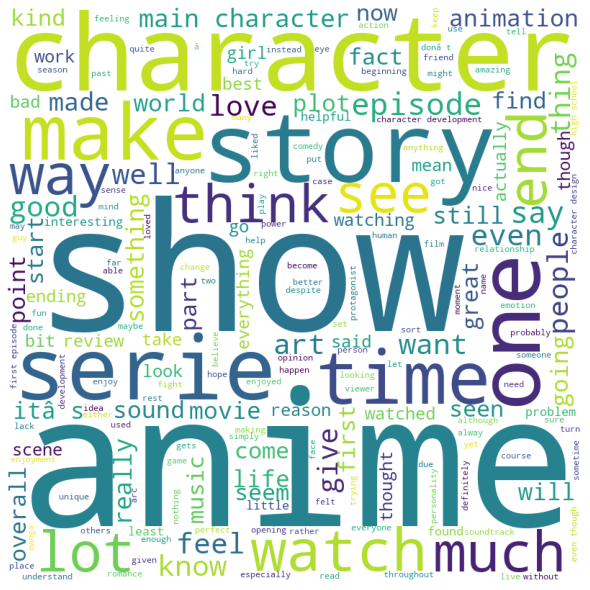

In [ ]:
comment_words= ''
stopwords = set(STOPWORDS)
for val in df_reviews.text:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "2
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [140]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125865 entries, 0 to 125864
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   title                  125865 non-null  object 
 1   text                   125865 non-null  object 
 2   Overall                125865 non-null  float64
 3   Story                  125865 non-null  int64  
 4   Animation              125865 non-null  int64  
 5   Music                  125865 non-null  int64  
 6   Character Development  125865 non-null  int64  
 7   Enjoyment              125865 non-null  int64  
 8   polarity               125865 non-null  float64
 9   subjectivity           125865 non-null  float64
 10  attitude               125865 non-null  object 
dtypes: float64(3), int64(5), object(3)
memory usage: 10.6+ MB


In [141]:
df_anime_reviews = pd.merge(df_reviews, df_animes[['title', 'genre', 'studio', 'season_released', 'year_released',
        'type', 'source', 'episodes', 'rating']], how='inner', on='title')
df_anime_reviews

,title,text,Overall,Story,Animation,Music,Character Development,Enjoyment,polarity,subjectivity,attitude,genre,studio,season_released,year_released,type,source,episodes,rating
0,Made in Abyss,...,10.00,10,10,10,10,10,0.157887,0.571909,Positive,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,R - 17+ (violence & profanity)
1,Made in Abyss,...,0.00,0,0,0,0,0,0.148182,0.615993,Positive,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,R - 17+ (violence & profanity)
2,Made in Abyss,...,9.51,9,10,9,9,10,0.204097,0.521248,Positive,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,R - 17+ (violence & profanity)
3,Made in Abyss,...,10.00,10,10,10,8,9,0.184405,0.610298,Positive,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,R - 17+ (violence & profanity)
4,Made in Abyss,...,8.52,7,10,10,5,6,0.152582,0.520738,Positive,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,R - 17+ (violence & profanity)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121836,Amagami SS,...,7.04,8,6,7,9,9,0.185425,0.487029,Positive,Slice of Life,AIC,Summer,2010,TV,Visual novel,25,PG-13 - Teens 13 or older
121837,Amagami SS,...,8.02,8,8,8,8,9,0.411667,0.514583,Positive,Slice of Life,AIC,Summer,2010,TV,Visual novel,25,PG-13 - Teens 13 or older
121838,Amagami SS,...,8.02,7,9,9,8,8,0.243773,0.535859,Positive,Slice of Life,AIC,Summer,2010,TV,Visual novel,25,PG-13 - Teens 13 or older
121839,Amagami SS,...,9.01,9,9,9,9,9,0.174913,0.555542,Positive,Slice of Life,AIC,Summer,2010,TV,Visual novel,25,PG-13 - Teens 13 or older


In [142]:
df_anime_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121841 entries, 0 to 121840
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype   
---  ------                 --------------   -----   
 0   title                  121841 non-null  object  
 1   text                   121841 non-null  object  
 2   Overall                121841 non-null  float64 
 3   Story                  121841 non-null  int64   
 4   Animation              121841 non-null  int64   
 5   Music                  121841 non-null  int64   
 6   Character Development  121841 non-null  int64   
 7   Enjoyment              121841 non-null  int64   
 8   polarity               121841 non-null  float64 
 9   subjectivity           121841 non-null  float64 
 10  attitude               121841 non-null  object  
 11  genre                  121841 non-null  category
 12  studio                 121841 non-null  object  
 13  season_released        121841 non-null  category
 14  year_released       

In [722]:
years = np.arange(1992,2019)
df_anime_reviews.year_released = df_anime_reviews.year_released.astype('int')
df_anime_reviews.year_released = pd.Categorical(df_anime_reviews.year_released, categories=years, ordered=True)

In [143]:
df_anime_reviews.dtypes

title                      object
text                       object
Overall                   float64
Story                       int64
Animation                   int64
Music                       int64
Character Development       int64
Enjoyment                   int64
polarity                  float64
subjectivity              float64
attitude                   object
genre                    category
studio                     object
season_released          category
year_released            category
type                     category
source                   category
episodes                    int64
rating                   category
dtype: object

In [725]:
df_anime_reviews

,title,text,Overall,Story,Animation,Music,Character Development,Enjoyment,polarity,subjectivity,attitude,genre,studio,season_released,year_released,type,source,episodes,rating
0,Made in Abyss,...,10,10,10,10,10,10,0.157887377,0.571908541,Positive,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,R - 17+ (violence & profanity)
1,Made in Abyss,...,2,0,0,0,0,0,0.148181513,0.615992927,Positive,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,R - 17+ (violence & profanity)
2,Made in Abyss,...,9.25,9,10,9,9,10,0.204097075,0.521248387,Positive,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,R - 17+ (violence & profanity)
3,Made in Abyss,...,9.75,10,10,10,8,9,0.184404919,0.610297593,Positive,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,R - 17+ (violence & profanity)
4,Made in Abyss,...,8.5,7,10,10,5,6,0.15258241,0.520738003,Positive,Sci-Fi,Kinema Citrus,Summer,2017,TV,Web manga,13,R - 17+ (violence & profanity)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120936,Amagami SS,...,7.5,8,6,7,9,9,0.185424934,0.48702877,Positive,Slice of Life,AIC,Summer,2010,TV,Visual novel,25,PG-13 - Teens 13 or older
120937,Amagami SS,...,8,8,8,8,8,9,0.411666667,0.514583333,Positive,Slice of Life,AIC,Summer,2010,TV,Visual novel,25,PG-13 - Teens 13 or older
120938,Amagami SS,...,8.25,7,9,9,8,8,0.243772874,0.535859064,Positive,Slice of Life,AIC,Summer,2010,TV,Visual novel,25,PG-13 - Teens 13 or older
120939,Amagami SS,...,9,9,9,9,9,9,0.174912587,0.555541958,Positive,Slice of Life,AIC,Summer,2010,TV,Visual novel,25,PG-13 - Teens 13 or older


In [153]:
df_anime_reviews.groupby(['year_released', 'attitude'])['title'].count().reset_index()

,year_released,attitude,title
0,1992,Negative,2
1,1992,Neutral,0
2,1992,Positive,56
3,1993,Negative,0
4,1993,Neutral,0
...,...,...,...
76,2017,Neutral,7
77,2017,Positive,7606
78,2018,Negative,526
79,2018,Neutral,3


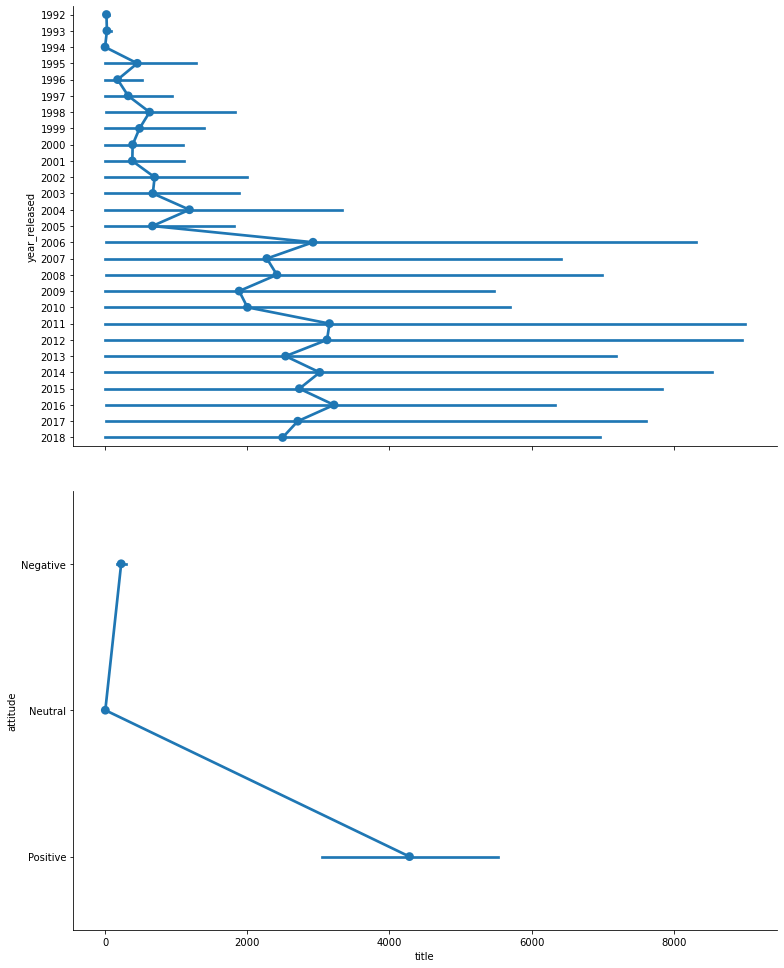

In [161]:
g= sb.PairGrid(data = df_anime_reviews.groupby(['year_released', 'attitude'])['title'].count().reset_index(),
                x_vars='title', y_vars=['year_released', 'attitude'])
g.map(sb.pointplot)
g.fig.set_size_inches(15,15)


In [728]:
fig = px.line(df_anime_reviews.groupby(['year_released', 'attitude'])['title'].count().reset_index(), 
        x='year_released', y='title', color='attitude', color_discrete_sequence=['red', 'blue', 'green'],
        orientation='v')
fig.show()

In [167]:
df_anime_reviews.query('year_released == 2006 and attitude == "Positive"').title.value_counts()

Death Note                          1682
Code Geass: Hangyaku no Lelouch      914
NHK ni Youkoso!                      558
Ouran Koukou Host Club               524
Higurashi no Naku Koro ni            510
Suzumiya Haruhi no Yuuutsu           404
Nana                                 366
Gintama                              362
Katekyo Hitman Reborn!               358
Black Lagoon                         316
Ergo Proxy                           308
Hellsing Ultimate                    268
Toki wo Kakeru Shoujo                266
Kanon (2006)                         240
Ghost Hunt                           188
Boku no Pico                         184
Fate/stay night                      166
Paprika                              148
Zero no Tsukaima                     116
Shijou Saikyou no Deshi Kenichi       92
Bokura ga Ita                         89
Black Lagoon: The Second Barrage      84
Tekkon Kinkreet                       64
Strawberry Panic                      61
Saiunkoku Monoga

In [168]:
df_anime_reviews.query('year_released == 2011 and attitude == "Positive"').title.value_counts()

Steins;Gate                                                 1528
Mirai Nikki (TV)                                             992
Ano Hi Mita Hana no Namae wo Bokutachi wa Mada Shiranai.     930
Ao no Exorcist                                               494
Guilty Crown                                                 395
Fate/Zero                                                    376
Nichijou                                                     336
Gosick                                                       326
Hotarubi no Mori e                                           312
Usagi Drop                                                   294
Mawaru Penguindrum                                           250
Deadman Wonderland                                           222
Hanasaku Iroha                                               196
Tiger & Bunny                                                150
Boku wa Tomodachi ga Sukunai                                 124
C: The Money of Soul and 

In [730]:
fig = px.line(df_anime_reviews.groupby(['season_released', 'attitude'])['title'].count().reset_index(), 
        x='season_released', y='title', color='attitude', color_discrete_sequence=['red', 'blue', 'green'],
        orientation='v')
fig.show()

#### Inferences:
>
>

> <hr>

In [757]:
df_anime_reviews.year_released = df_anime_reviews.year_released.astype('int64')

In [170]:
plt.bar(df_anime_reviews, x='year_released', y='attitude', hue='season_released')
plt.xticks(np.arange(1992,2019,1)) # add loads of ticks
plt.grid()

plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = 1
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*1000+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])            

TypeError: bar() got multiple values for argument 'x'